<a href="https://colab.research.google.com/github/yogeeshTR/yogeesh-tejur/blob/master/Copy_of_US_Accidents_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yogeeshtr
Your Kaggle Key: ··········


  0%|          | 0.00/299M [00:00<?, ?B/s]

100%|██████████| 299M/299M [00:10<00:00, 31.4MB/s]


In [ ]:
data_filename='/content/us-accidents/US_Accidents_Dec20.csv'

##Data Preparation and cleaning
1.load the data set file using pandas.
2.looking at some information about the data and the columns
3.Fix any missing or incorrect values

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv(data_filename)

In [ ]:
df.head(3)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day


In [ ]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
len(df)

4232541

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [ ]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


## Ask and answer Question
1. Are there more accidents in warmer or colder area?
2. which state has the highest number of highest accidents.? How about Per capita?  

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

15

In [ ]:
numeric_df

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,201.0,3,39.865147,-84.058723,NaN,NaN,0.010,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
1,201.0,2,39.928059,-82.831184,NaN,NaN,0.010,2584.0,37.9,NaN,100.0,29.65,10.0,NaN,0.00
2,201.0,2,39.063148,-84.032608,NaN,NaN,0.010,NaN,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,201.0,3,39.747753,-84.205582,NaN,NaN,0.010,NaN,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,201.0,2,39.627781,-84.188354,NaN,NaN,0.010,NaN,36.0,33.3,89.0,29.65,6.0,3.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232536,NaN,2,34.002480,-117.379360,33.99888,-117.37094,0.543,NaN,86.0,86.0,40.0,28.92,10.0,13.0,0.00
4232537,NaN,2,32.766960,-117.148060,32.76555,-117.15363,0.338,NaN,70.0,70.0,73.0,29.39,10.0,6.0,0.00
4232538,NaN,2,33.775450,-117.847790,33.77740,-117.85727,0.561,NaN,73.0,73.0,64.0,29.74,10.0,10.0,0.00
4232539,NaN,2,33.992460,-118.403020,33.98311,-118.39565,0.772,NaN,71.0,71.0,81.0,29.62,10.0,8.0,0.00


In [ ]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TMC                float64
 1   Severity           int64  
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   End_Lat            float64
 5   End_Lng            float64
 6   Distance(mi)       float64
 7   Number             float64
 8   Temperature(F)     float64
 9   Wind_Chill(F)      float64
 10  Humidity(%)        float64
 11  Pressure(in)       float64
 12  Visibility(mi)     float64
 13  Wind_Speed(mph)    float64
 14  Precipitation(in)  float64
dtypes: float64(14), int64(1)
memory usage: 484.4 MB


In [ ]:
df.isna( ).sum().sort_values(ascending=False)

End_Lat                  2716477
End_Lng                  2716477
Number                   2687949
Precipitation(in)        2065589
Wind_Chill(F)            1896001
TMC                      1516064
Wind_Speed(mph)           479326
Visibility(mi)             98668
Weather_Condition          98383
Humidity(%)                95467
Temperature(F)             89900
Wind_Direction             83611
Pressure(in)               76384
Weather_Timestamp          62644
Airport_Code                8973
Timezone                    4615
Zipcode                     1292
Nautical_Twilight            141
Astronomical_Twilight        141
Civil_Twilight               141
Sunrise_Sunset               141
City                         137
Description                    2
Amenity                        0
Street                         0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng 

In [ ]:
missing_percentage=df.isna( ).sum().sort_values(ascending=False)/len(df)
missing_percentage

End_Lat                  6.418076e-01
End_Lng                  6.418076e-01
Number                   6.350674e-01
Precipitation(in)        4.880258e-01
Wind_Chill(F)            4.479581e-01
TMC                      3.581924e-01
Wind_Speed(mph)          1.132478e-01
Visibility(mi)           2.331176e-02
Weather_Condition        2.324443e-02
Humidity(%)              2.255548e-02
Temperature(F)           2.124020e-02
Wind_Direction           1.975433e-02
Pressure(in)             1.804684e-02
Weather_Timestamp        1.480057e-02
Airport_Code             2.120003e-03
Timezone                 1.090362e-03
Zipcode                  3.052540e-04
Nautical_Twilight        3.331332e-05
Astronomical_Twilight    3.331332e-05
Civil_Twilight           3.331332e-05
Sunrise_Sunset           3.331332e-05
City                     3.236826e-05
Description              4.725294e-07
Amenity                  0.000000e+00
Street                   0.000000e+00
Source                   0.000000e+00
Severity    

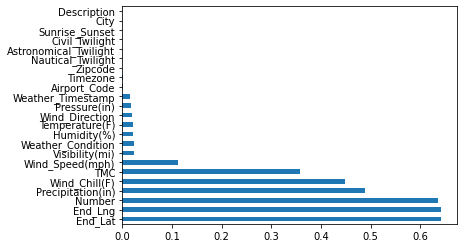

In [ ]:
missing_percentage[missing_percentage!=0].plot(kind='barh')

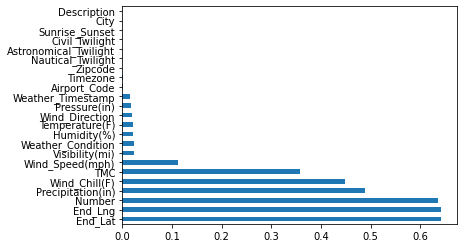

In [ ]:
missing_percentage[missing_percentage!=0].plot(kind='barh')

In [ ]:
import seaborn as sns



Exploratory analysis and Vizualization

Her we analyze some columns
1.city
2.start_lat,start_lng
3.temperature
4.weather condition
5.eventhough the new york had heigest population why it does not showing in list


In [ ]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
len((df.City.unique()))

12251

In [ ]:
cities_by_accidents=df.City.value_counts()
cities_by_accidents[:20]

Houston          114905
Los Angeles       92701
Charlotte         88887
Dallas            77303
Austin            70538
Miami             63162
Raleigh           52876
Atlanta           46328
Baton Rouge       42814
Nashville         41850
Orlando           39561
Oklahoma City     39484
Sacramento        38061
Phoenix           32805
Minneapolis       31781
San Diego         29416
Seattle           28004
Richmond          27907
San Antonio       27516
Jacksonville      24009
Name: City, dtype: int64

In [ ]:
df.State.value_counts()

CA    972585
TX    376445
FL    370131
SC    212712
NC    193457
NY    189513
PA    136049
VA    127949
IL    111712
OR    108352
GA    107116
MI    105772
MN    105497
AZ     93103
TN     88495
LA     80560
WA     74705
OH     73161
MD     69958
NJ     69167
OK     64871
UT     58010
AL     57017
CO     54035
MA     44115
MO     40153
IN     38114
CT     32520
NE     25006
KY     24713
WI     21519
IA     14205
RI     12911
NV     12023
KS      9738
NH      8559
MS      8055
DE      6908
DC      6511
NM      6462
AR      5105
ID      4251
WV      3617
MT      3357
ME      2346
VT       771
WY       521
ND       469
SD       220
Name: State, dtype: int64

In [ ]:
df.State.unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'ME', 'VT', 'TN', 'NC',
       'KS', 'MN', 'LA', 'OK', 'AR', 'UT', 'CO', 'AZ', 'NM', 'NV', 'MS',
       'ID', 'WY', 'MT', 'ND', 'SD'], dtype=object)

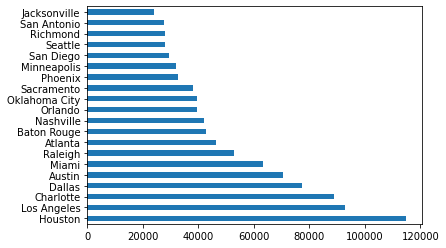

In [ ]:
cities_by_accidents[:20].plot(kind="barh")

In [ ]:
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


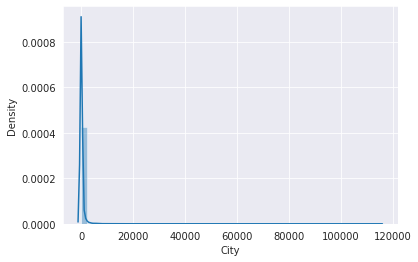

In [ ]:
sns.distplot(cities_by_accidents)

In [ ]:
high_accidents_cities=cities_by_accidents[cities_by_accidents>=1000]
len(high_accidents_cities)


704

In [ ]:
low_accidents_cities=cities_by_accidents[cities_by_accidents<1000]
len(low_accidents_cities)

11546

In [ ]:
len(high_accidents_cities)/ len(cities_by_accidents)*100

5.746938775510204

In [ ]:
len(cities_by_accidents)

12250

In [ ]:
df.Start_Time=pd.to_datetime(df.Start_Time)
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

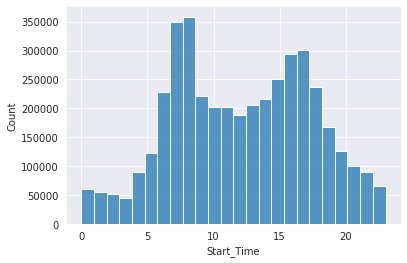

In [ ]:
sns.histplot(df.Start_Time.dt.hour,bins=24)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


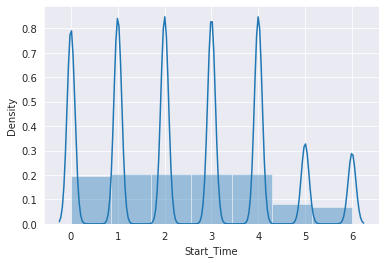

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,norm_hist=True)

* From above analysis we conclude that accidents are happening in between 7 to 10 am (propabaly people are in hurry ).
* next highest accidents happende in 3 to 7 pm.

In [ ]:
#is the distribution of accidents by hour the same on weekends as on weekdays

In [ ]:
df.head(3)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day


In [ ]:
df.Start_Time[df['Start_Time'].dt.dayofweek==6] 

135       2016-02-14 10:13:00
136       2016-02-14 10:49:23
137       2016-02-14 10:41:57
138       2016-02-14 18:15:23
139       2016-02-14 19:17:01
                  ...        
4230287   2019-08-18 22:48:14
4230288   2019-08-18 23:24:10
4230402   2019-08-18 22:56:56
4230403   2019-08-18 22:56:56
4230442   2019-08-18 22:54:41
Name: Start_Time, Length: 255920, dtype: datetime64[ns]

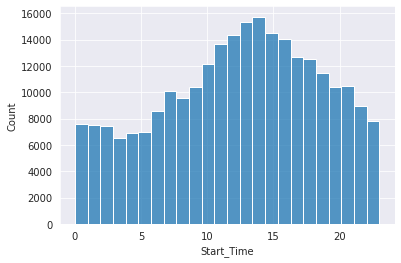

In [ ]:
sns.histplot(df.Start_Time[df['Start_Time'].dt.dayofweek==6] .dt.hour,bins=24)

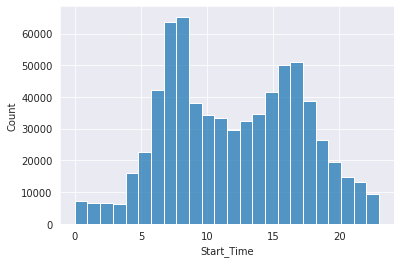

In [ ]:
# comparison with monday data set
sns.histplot(df.Start_Time[df['Start_Time'].dt.dayofweek==0] .dt.hour,bins=24)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


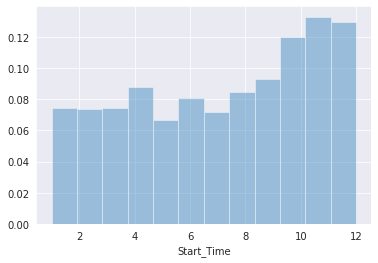

In [ ]:
monday_start_time=df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(monday_start_time.dt.month,bins=12, kde=False, norm_hist=True)

In [ ]:
#can you explain the month -wise trend of accidents?
#_Much data is missing for 2016. May be even in 2017
#There seems to be some issue with the Bing data 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


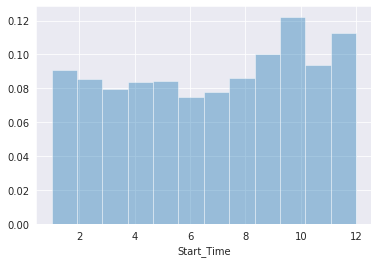

In [ ]:
df_2019=df[df.Start_Time.dt.year ==2019]
df_2019_Bing =df_2019[df.Source =="MapQuest-Bing"]
sns.distplot(df_2019.Start_Time.dt.month, bins=12 ,kde=False, norm_hist=True)

In [ ]:
df["Source"].unique()

array(['MapQuest', 'MapQuest-Bing', 'Bing'], dtype=object)

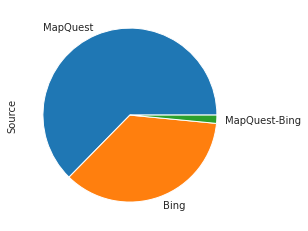

In [ ]:
df.Source.value_counts().plot(kind="pie")

consider excluding bing data tha thave some issue

start lattitude and longitude 


In [ ]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
4232536    34.002480
4232537    32.766960
4232538    33.775450
4232539    33.992460
4232540    34.133930
Name: Start_Lat, Length: 4232541, dtype: float64

In [ ]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
4232536   -117.379360
4232537   -117.148060
4232538   -117.847790
4232539   -118.403020
4232540   -117.230920
Name: Start_Lng, Length: 4232541, dtype: float64

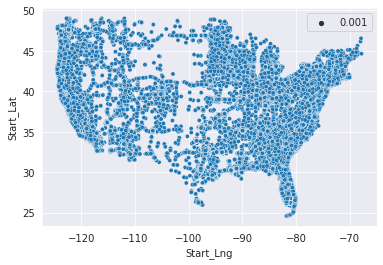

In [ ]:
sample_df=df.sample(int(0.1*len(df)))

sns.scatterplot(x= sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [ ]:
import folium

In [ ]:
folium.Map()

In [ ]:
HeatMap(list(zip(df.Start_Lat, df.Start_Lng))).add_to(map)

[(39.865147, -84.058723),
 (39.928059000000005, -82.831184),
 (39.063148, -84.032608),
 (39.747753, -84.20558199999999),
 (39.627781, -84.188354),
 (40.100590000000004, -82.92519399999999),
 (39.758274, -84.23050699999999),
 (39.770382, -84.194901),
 (39.778061, -84.172005),
 (40.100590000000004, -82.92519399999999),
 (39.952812, -83.119293),
 (39.932709, -82.83091),
 (39.737633, -84.14993299999999),
 (39.79076, -84.241547),
 (39.972038, -82.913521),
 (39.745888, -84.17041),
 (39.748329, -84.224007),
 (39.752174, -84.239952),
 (39.740669, -84.184135),
 (39.790703, -84.244461),
 (40.052509, -82.88233199999999),
 (39.773346000000004, -84.224686),
 (39.628288, -84.226151),
 (40.023487, -82.994888),
 (39.761379, -84.25921600000001),
 (40.158024, -82.641762),
 (39.733219, -84.159653),
 (39.775303, -84.200523),
 (39.789322, -84.23910500000001),
 (39.758720000000004, -84.183762),
 (40.081459, -83.122398),
 (39.83321, -84.112946),
 (40.042725, -82.99730699999999),
 (39.974415, -82.848854),
 (3

In [ ]:
from folium.plugins import HeatMap

In [ ]:
sample_df=df.sample(int(0.001* len(df)))
lat_lon_pairs=list(zip(sample_df.Start_Lat, sample_df.Start_Lng))

In [ ]:
map=folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

Ask and answer Question












# US accident Explorataory data analysis

To Do- talk about EDA
To Do- talk about dataset(source, when it contains, how it will be useful)


*   kaggle
*   Linformation about accident
*   can useful to  prevent accidents 
*   Among  the top 100 cities in number of accidents which states do they belongs to most frequently.
*    what time of the day accidents are more frequently
*    which day of the week have most     accidents?
*    what is the trend of accidents year over year (decresing/increasing?)
*    when is the accidents is high per signal?






